# CodeClause Data Science Internship-Task 1


## Author: Roshini B
## Topic: Churn Prediction in Telecom Industry using Logistic Regression

Each row represents a customer, each column contains customer’s attributes.

The raw data contains 7043 rows (coustomers) and 21 columns (features)

The "Churn" is our target!!

##### Importing the packages required

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

##### Reading the CSV file

In [5]:
df=pd.read_csv("Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

##### Displaying the file content

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Information about the file

In [8]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

##### Checking for null values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Exploratory Data Analysis on the dataset

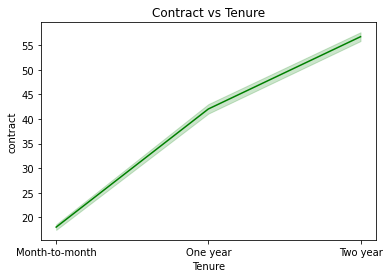

In [16]:
sns.lineplot(x='Contract',y='tenure',data=df,color="green")
plt.title("Contract vs Tenure")
plt.xlabel('Tenure')
plt.ylabel('contract')
plt.show()

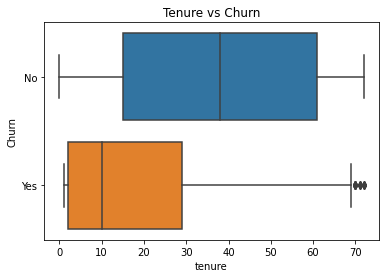

In [18]:
sns.boxplot(x='tenure',y='Churn',data=df)
plt.title("Tenure vs Churn")
plt.show()

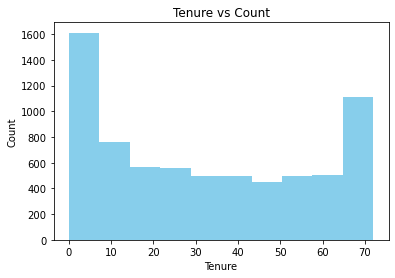

In [22]:
plt.hist(df['tenure'],color="skyblue")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Tenure vs Count")
plt.show()

##### Finding unique elements in the columns

In [26]:
col=['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup',
   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for i in col:
    print(i,df[i].unique())

Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
PaperlessBilling ['Yes' 'No']


##### Encoding the categories in the column into 0 and 1

In [30]:
bin=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for i in bin:
    df[i]=LabelEncoder().fit_transform(df[i])
for i in bin:
    print(i,df[i].unique())

Partner [1 0]
Dependents [0 1]
PhoneService [0 1]
PaperlessBilling [1 0]
Churn [0 1]


##### Encoding object datatype into integers

In [36]:
def obj_encode(ob):
    if ob.dtype=='object':
        ob=LabelEncoder().fit_transform(ob)
    return ob

In [37]:
churn=df.apply(lambda x:obj_encode(x))
churn.head().T

,0,1,2,3,4
customerID,5375.00,3962.00,2564.00,5535.0,6511.0
gender,0.00,1.00,1.00,1.0,0.0
SeniorCitizen,0.00,0.00,0.00,0.0,0.0
Partner,1.00,0.00,0.00,0.0,0.0
Dependents,0.00,0.00,0.00,0.0,0.0
tenure,1.00,34.00,2.00,45.0,2.0
PhoneService,0.00,1.00,1.00,0.0,1.0
MultipleLines,1.00,0.00,0.00,1.0,0.0
InternetService,0.00,0.00,0.00,0.0,1.0
OnlineSecurity,0.00,2.00,2.00,2.0,0.0


##### Assigning x and y values

In [49]:
X=churn.drop(columns=['Churn'])
y=churn['Churn'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [41]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


##### Fit the logistic regression model (Training)

In [52]:
log_Reg=LogisticRegression()
log_Reg.fit(X_train,y_train)

LogisticRegression()

##### Predicting the model

In [55]:
y_pred=log_Reg.predict_proba(X_test)[:,1]
y_pred

array([0.03771163, 0.8031027 , 0.32901383, ..., 0.243293  , 0.63547125,
       0.09025618])

##### Predicted Array

In [56]:
pred=log_Reg.predict(X_test)
pred

array([0, 1, 0, ..., 0, 1, 0])

##### Accuracy of the model after training and testing

In [57]:
accuracy=((pred==y_test).sum()/len(y_test))
print("Accuracy:",accuracy)

Accuracy: 0.7808802650260294


##### Classification of the report

In [58]:
report=classification_report(pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1642
           1       0.51      0.60      0.55       471

    accuracy                           0.78      2113
   macro avg       0.69      0.72      0.70      2113
weighted avg       0.80      0.78      0.79      2113



##### Correlation Matrix using Heatmap

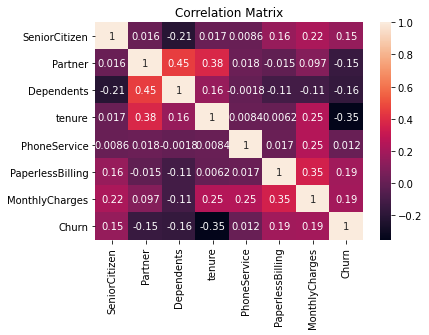

In [59]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

##### ROC Curve (showing the performance of a classification model )

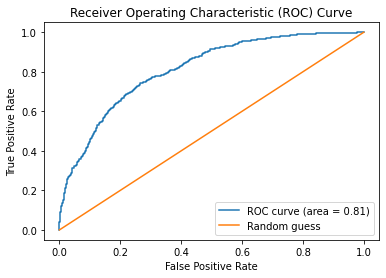

In [60]:
f,t,thresholds=roc_curve(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
plt.plot(f,t,label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], linestyle='-', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### Test-1 on the model

In [63]:
df=churn.loc[1106:1106,:]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1106,2917,0,0,0,0,63,1,2,1,0,...,0,0,2,2,2,0,0,97.45,5069,0


In [65]:
X_new=df.drop("Churn",axis=1)
X_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1106,2917,0,0,0,0,63,1,2,1,0,2,0,0,2,2,2,0,0,97.45,5069


##### Final Output of Test-1

In [67]:
output=log_Reg.predict(X_new)
if output==0:
    print("NO Churn")
else:
    print("Churn")

NO Churn


##### Test-2 on the model

In [80]:
df=churn.loc[10:10,:]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
10,6871,1,0,1,1,13,1,0,0,2,...,0,0,0,0,0,1,3,49.95,4823,0


In [81]:
X_new=df.drop("Churn",axis=1)
X_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
10,6871,1,0,1,1,13,1,0,0,2,0,0,0,0,0,0,1,3,49.95,4823


In [82]:
output=log_Reg.predict(X_new)
if output==0:
    print("NO Churn")
else:
    print("Churn")

NO Churn
